# I/O pattern generation

This is for a demonstration of how to use generative models to generate I/O patterns.

In [1]:
import sys

sys.path.append("..")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from tracegen import appinfo, tracegen
from tracegen.model import FeatureGenerator, TraceGenerator, getparam, intp
from tracegen.normalizing_flows import NormalizingFlow
from tracegen.utils import random_normal_samples

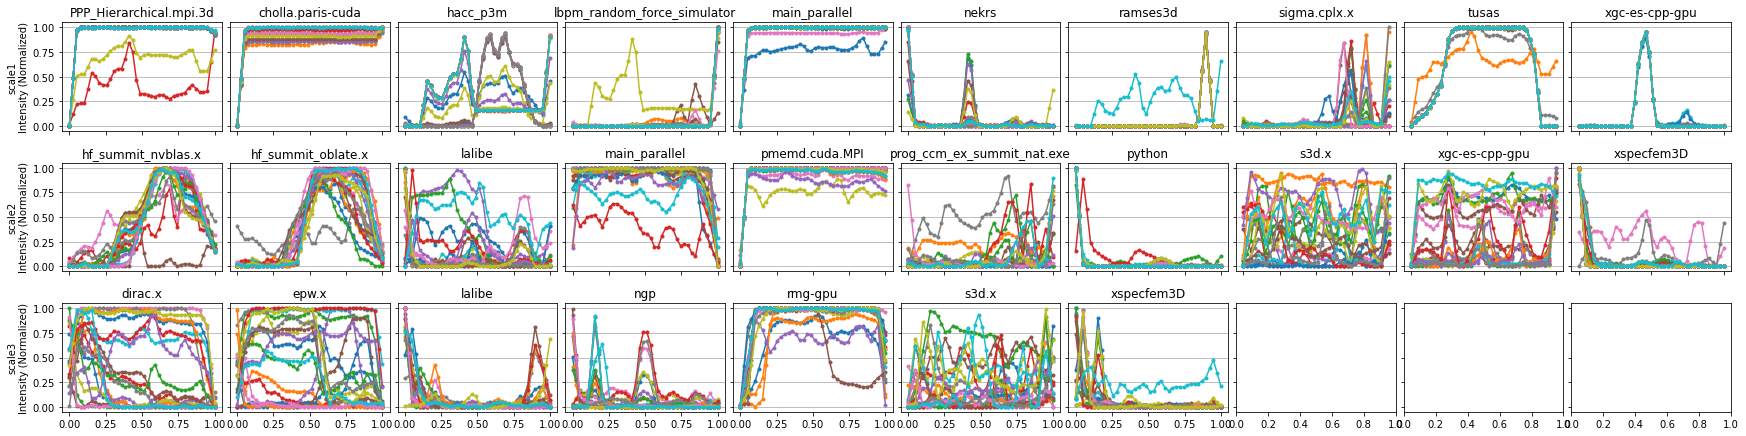

In [3]:
fig, axs = plt.subplots(3, 10, figsize=[24, 6], sharey=True)
fig.tight_layout()
fig.subplots_adjust(wspace=0.05)

for k in range(3):
    app = appinfo(k)
    for i in range(len(app)):
        scale, appname, traces = tracegen(k, i, nsample=20)
        for y in traces:
            xs, ys = intp(y)
            axs[k, i].plot(xs, ys, ".-")
        axs[k, i].set_title("%s" % (app[i]))
        axs[k, i].grid(axis="y")
        axs[k, 0].set_ylabel("%s\nIntensity (Normalized)" % scale)

for ax in axs.flat:
    ax.label_outer()
plt.show()